In [8]:
#getting data from data sci wiki page

import requests 

url = 'https://en.wikipedia.org/wiki/Data_science'
text = requests.get(url).content.decode('utf-8')
print(text[:1000])


<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"650c262d-d93d-4e32-a36e-6cb964c75acc","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1091995814,"wgRevisionId":1091995814,"wgArticleId":35458904,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description matches Wikidata","Use dmy dates from August 2021","Information science","Computer occupations","Comput

In [11]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')
parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])       


 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Data science  is an  interdisciplinary  field that uses  scientific methods , processes,  algorithms  and systems to extract  knowledge  and insights from noisy, structured and  unstructured data , [1] [2]  and apply knowledge from data across a broad range of application domains. Data science is related to  data mining ,  machine learning  and  big data .
 Data science is a "concept to unify  statistics ,  data analysis ,  informatics , and their related  methods " in order to "understand and analyse actual  phenomena " with  data . [3]  It uses

In [12]:
import sys
!{sys.executable} -m pip install nlp_rake

ERROR: Could not find a version that satisfies the requirement nlp_rake (from versions: none)
ERROR: No matching distribution found for nlp_rake


In [21]:
import nlp_rake as rk
extractor = rk.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.9107142857142856),
 ('information science', 3.9107142857142856),
 ('computer science', 3.9107142857142856),
 ('application domains', 3.75),
 ('data analysis', 3.666666666666667),
 ('science', 1.9107142857142858),
 ('insights', 1.25),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

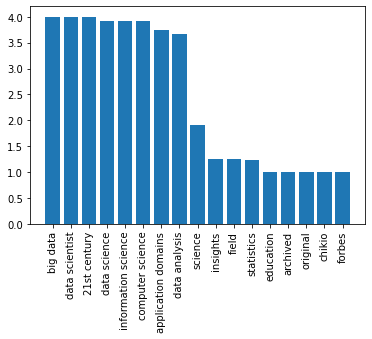

In [24]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)
    

In [1]:
!{sys.executable} -m pip install wordcloud

'{sys.executable}' is not recognized as an internal or external command,
operable program or batch file.


In [39]:
 from wordcloud import WordCloud 
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

ModuleNotFoundError: No module named 'wordcloud'